$$
\Huge{
    Boundary \ Conditions\\
    \boxed{\text{1. Dirichlet}}\\
    p(t, x_{min}) = 0.\\
    p(t, x_{max}) = 0.
    \\
    \boxed{\text{2. Neumann}}\\
    p(t, x_{min}) = p(t, x_{min}+\Delta x)\\
    p(t, x_{max}) = p(t, x_{max}-\Delta x)
    \\
    \boxed{\text{3. Open}}\\
    p(t, x_{max}) = p(t, x_{max}-\Delta x) -\frac{1}{c}(p(t, x_{max}-\Delta x)-p(t-\Delta t, x_{max}-\Delta x))  \frac{\Delta x}{\Delta t}\\
    p(t, x_{min}) = p(t, x_{min}+\Delta x) -\frac{1}{c}(p(t, x_{min}+\Delta x)-p(t-\Delta t, x_{min}+\Delta x))  \frac{\Delta x}{\Delta t}
    \\
    \boxed{\text{4. Periodic}}\\
    p(t, x_{min}) = p(t, x_{max}-\Delta x)\\
    p(t, x_{max}) = p(t, x_{min}+\Delta x)
}
$$

In [103]:
import numpy as np
import matplotlib.pyplot as plt

sx = nx // 4
def aco_wave_1d(nt, dt, nx, dx, f0, t0, c, bc='d'):
    t = np.arange(nt) * dt
    x = np.arange(nx) * dx
    s = (1-2*(np.pi*f0*(t-t0))**2) * np.exp(-(np.pi*f0*(t-t0))**2)
    p = np.zeros((nt, nx))
    for i in range(1, nt-1):
        for j in range(1, nx-1):
            if j == sx:
                p[i+1, j] = s[i]
            else:
                p[i+1, j] = 2*p[i, j] - p[i-1, j] + (c*dt/dx)**2 * (p[i, j+1]-2*p[i, j]+p[i, j-1])
        if bc == 'Neumann':
            p[i+1, 0] = p[i+1, 1]; p[i+1, nx-1] = p[i+1, nx-2]
        elif bc == 'Open':
            p[i+1, nx-1] = p[i+1, nx-2] - (p[i+1, nx-2]-p[i, nx-2]) * dx / dt / c
            p[i+1, 0]= p[i+1, 1]- (p[i+1, 1]- p[i, 1]) * dx / dt / c
        elif bc == 'Periodic':
            p[i+1, nx-1] = p[i+1, 1]
            p[i+1, 0]= p[i+1, nx-2]
        else:
            pass
    return x, t, p

def plot_aco_1D(x, t, p, bc):
    nt = len(p[:, 0])
    plt.figure(figsize=(10, 10))
    tn = 10
    tt = nt // tn
    for i in range(tn):
        d = p[i*tt] * 80
        plt.plot(x, d+i*tt, lw=4, color='b')
    plt.ylabel('Time [s]', fontsize=30)
    plt.xlabel('X [m]', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(bc, fontsize=30)


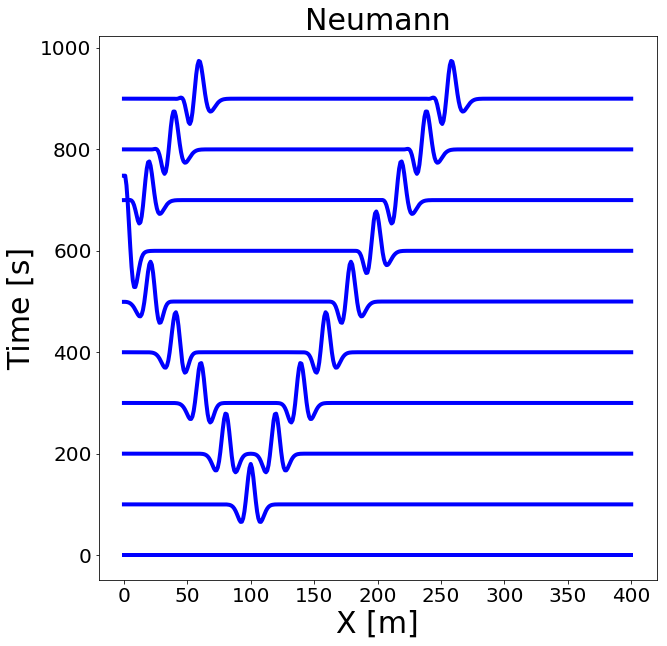

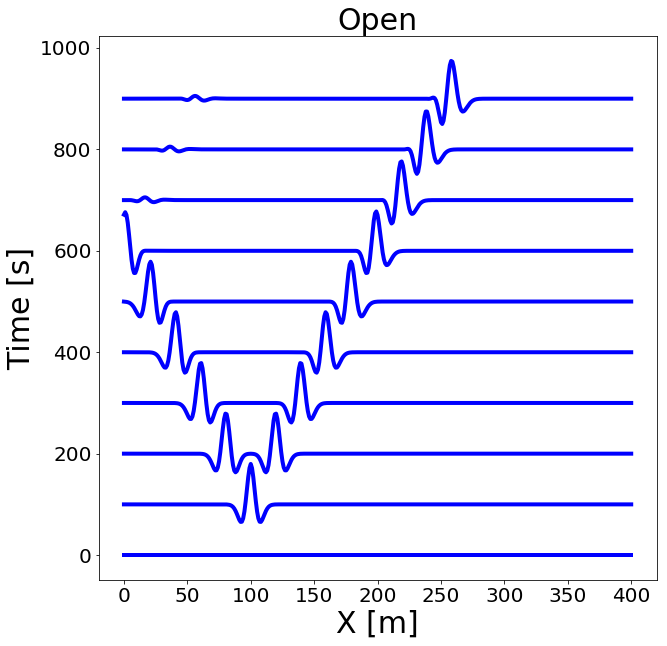

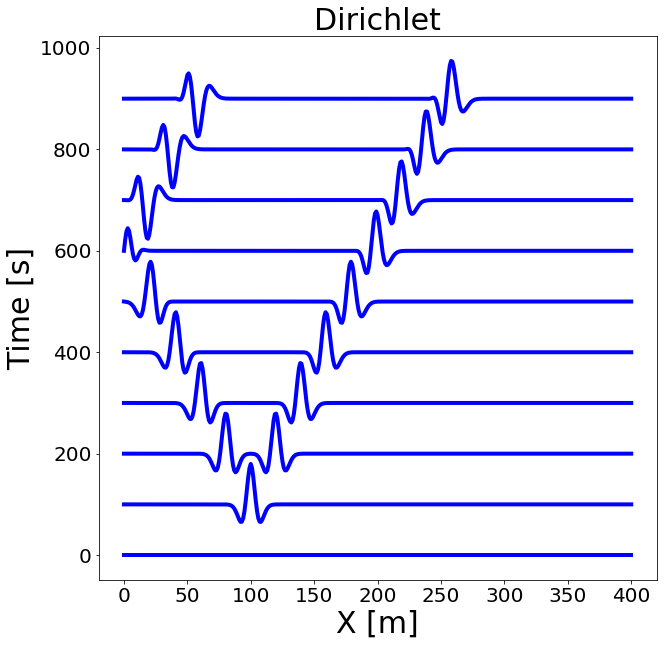

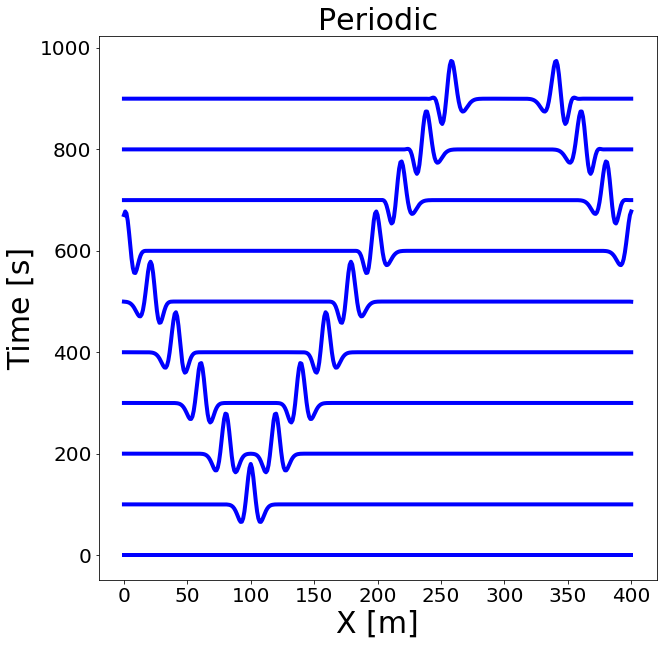

In [104]:
# plt.figure(figsize=(10, 5))
# plt.plot(t, s, lw=2)
# plt.xlabel('Time [s]', fontsize=20)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.show()
f0 = 10
t0 = 0.1
nt = 1001
dt = 1e-3
c = 200.
nx = 401
dx = 1
# Neumann boundary condition
bc = 'Neumann'
x, t, p = aco_wave_1d(nt, dt, nx, dx, f0, t0, c, bc=bc)
plot_aco_1D(x, t, p, bc=bc)

# Open boundary condition
bc = 'Open'
x, t, p = aco_wave_1d(nt, dt, nx, dx, f0, t0, c, bc=bc)
plot_aco_1D(x, t, p, bc=bc)

# Dirichlet boundary condition
bc = 'Dirichlet'
x, t, p = aco_wave_1d(nt, dt, nx, dx, f0, t0, c, bc=bc)
plot_aco_1D(x, t, p, bc=bc)

# Periodic boundary condition
bc = 'Periodic'
x, t, p = aco_wave_1d(nt, dt, nx, dx, f0, t0, c, bc=bc)
plot_aco_1D(x, t, p, bc=bc)